# Airline Customer Value Analysis With Clustering Algorithms

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df=pd.read_csv('flight.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('flight.csv')

# Initial Data Understanding and Pre-Processing

In [4]:
df.sample(20)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
33789,40653,9/30/2010,9/30/2010,Female,4,beijing,beijing,CN,40.0,3/31/2014,2,6357,0.0,5336.0,5420,2/9/2014,52,10.000000,10,0,1.155000,6357,0
18918,50930,4/28/2012,4/28/2012,Male,4,hangzhou,zhejiang,CN,40.0,3/31/2014,24,10277,7066.0,4838.0,18187,3/27/2014,5,30.391304,155,0,0.710835,10277,0
32192,12183,7/25/2010,7/25/2010,Male,4,zhuhai,guangdong,CN,35.0,3/31/2014,6,3273,2516.0,3497.0,12426,3/2/2014,30,136.600000,393,0,0.542873,3273,0
23497,13962,11/4/2010,11/4/2010,Male,4,guangzhou,guangdong,CN,32.0,3/31/2014,12,7625,6262.0,3483.0,17908,3/3/2014,29,63.000000,327,0,0.574751,7625,0
9564,41174,10/18/2011,10/18/2011,Male,4,zhongqing,.,CN,32.0,3/31/2014,30,20885,7508.0,13221.0,29516,12/18/2013,105,17.862069,102,1,0.768147,25737,11
40525,35037,11/30/2012,12/7/2012,Female,4,anshanshi,liaoningsheng,CN,37.0,3/31/2014,6,1336,2993.0,2107.0,10537,7/12/2013,264,43.400000,105,0,0.430216,1336,0
44598,18245,11/29/2010,8/2/2013,Male,4,beijing,beijing,CN,43.0,3/31/2014,4,3099,0.0,2655.0,4938,8/20/2013,225,6.000000,14,0,0.748777,7331,29
26045,59605,10/7/2012,10/7/2012,Female,4,GORDON,NSW,AU,56.0,3/31/2014,5,11316,10816.0,0.0,10524,11/1/2012,517,6.250000,12,0,0.860585,11316,0
29647,13255,12/16/2009,12/16/2009,Male,4,beijing,beijing,CN,48.0,3/31/2014,7,6367,3603.0,3151.0,10407,11/27/2013,126,97.333333,194,0,0.731060,6367,0
19840,45971,11/9/2006,4/9/2012,Male,4,shanghai,shanghai,CN,37.0,3/31/2014,18,9302,4458.0,7398.0,19832,3/4/2014,28,40.882353,112,0,0.621305,9302,0


There are some weird values in these columns, we will see the details later down below

In [5]:
# Initial data transformation :  converting column name to lowercase
df.columns = df.columns.str.lower()

In [6]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

<b>Features Description</b>

 <pre>
member_no: Member ID
ffp_date: Frequent Flyer Program Join Date
first_flight_date: First Flight Date
gender: Gender
ffp_tier: Frequent Flyer Program Tier
work_city: Work City
work_province: Work Proviince
work_country: Work Country
age: Customer Age
load_time: Date data was taken
flight_count: Number of customer flights
bp_sum: Total basic integral
sum_yr_1: Fare Revenue
sum_yr_2: Votes Prices
seg_km_sum: Total distance (km) flights that have been done
last_flight_date: Last Flight Date
last_to_end: last flight time to last flight order interval
avg_internal: Average time distance
max_interval: Maximum time distance
exchange_count: Number of redemptions
avg_discount: The average discount that customers get
points_sum: The number of points earned by the customer
point_notflight: Points not used by members

Some of the data type are wrong here like features that have date values which are ffp_date, first_flight_date, last_flight_date, load_time, but the data type is assigned as object. There are also features that should have int values but are assigned as float like age, sum_yr_1, sum_yr_2. We will need to convert them later if needed

Now we will check some of the weird values in the dataset that we found before

In [7]:
#Check inconsistent values in work_city feature
for values in df['work_city'].unique()[:30]: #before showing only 30 we tried it for all data values
    print(values)

.
nan
Los Angeles
guiyang
guangzhou
wulumuqishi
wenzhoushi
DRANCY
wenzhou
PARIS
beijing
SAN MARINO
shenzhen
BOWLAND HEIGHTS
wulumuqi
dongguan
VECHEL
zhanjiang
guangzhoushi
Paris
UPLAND
fanyu
changsha
SUMIDA-KU
HK
PUCHONG
hangzhoushi
TORRANCE
chengdu
shishi


In [8]:
#Check inconsistent values in work_province feature
for values in df['work_province'].unique()[:30]: #before showing only 30 we tried it for all data values
    print(values)

beijing
CA
guizhou
guangdong
xinjiang
zhejiang
nan
PARIS
.
CALIFORNIA
NORD BRABANT
FRANCE
guangdongsheng
hunan
TOKYO-TO
HK
Selangor Darul Ehsan
sichuan
fujian
VIC
shanghai
Noord-Holland
FR
zhongqing
guangxi
CA91030
ZUID HOLLAND
xianggang
jilin
ANDE


As we can see that both work_city and work_province feature values are very dirty and non-consistent, some of the values even only have symbols like '?' and '--' where in city and province this does not make any sense at all. There is a high chance we will avoid using these features at all in our clustering analysis

In [9]:
df.columns

Index(['member_no', 'ffp_date', 'first_flight_date', 'gender', 'ffp_tier',
       'work_city', 'work_province', 'work_country', 'age', 'load_time',
       'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_flight_date', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [10]:
#Check format values in date features
for values in df['first_flight_date'].unique()[:30]: # check also for other date features
    print(values)

12/24/2008
8/3/2007
8/30/2007
8/23/2008
4/15/2009
9/29/2009
3/29/2006
4/9/2010
7/1/2011
7/5/2010
11/20/2010
12/2/2004
11/18/2007
10/27/2007
2/1/2010
4/5/2008
8/20/2010
2/23/2011
2/22/2007
10/22/2011
11/21/2008
6/9/2011
4/10/2005
4/13/2010
3/1/2010
11/1/2010
3/23/2007
3/17/2005
1/8/2006
6/27/2008


All of the date features have the original format of MM/DD/YY, we will change it later to YY-MM-DD with pd.to_datetime() method

In [11]:
#Check values in load_time feature
df['load_time'].unique()

array(['3/31/2014'], dtype=object)

The feature load_time which from the definition is the date where data was taken only have 1 value that is 3/31/2014; and this actually does not have any meaning to our clustering analysis here so later we will drop or does not use this feature at all

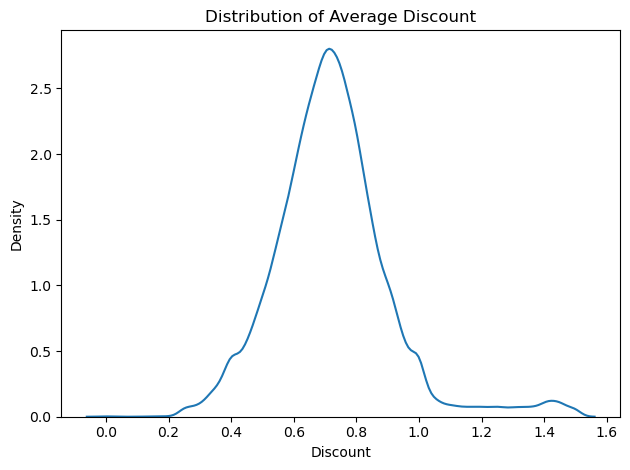

In [12]:
#Check values in avg_discount feature
sns.kdeplot(x = 'avg_discount', data=df)
plt.title("Distribution of Average Discount")
plt.ylabel("Density")
plt.xlabel("Discount")
plt.tight_layout()

- The distribution of avg_discount is kinda weird here. From the definition it says that avg_discount is the average discount that customers get, while from the values range this should be in percentage, then avg_discount that > 1 (100%) is not valid making this information is hard to interpret because the scaling problem from the beginning, will probably not use this feature either.
- We could however filter this using only data with <= 1 discount (with the code down below), but this move is not recommended since we doesn't know the details about what the problem here, whether it's the only scaling problem and it actually interpreted in another way or the system that gather the data.

In [13]:
# #Filter the avg_discount more than 1
# df = df[df['avg_discount']<=1]

In [14]:
#Checking amount of duplicated values
df.duplicated().sum()

0

In [15]:
#Checking missing values
df.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

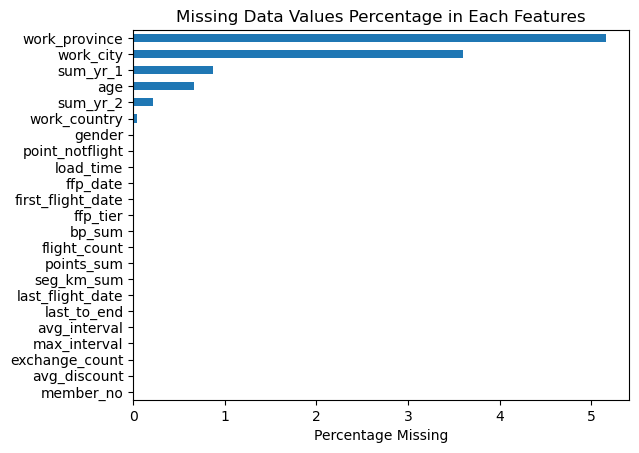

In [16]:
#Visualize percentage of missing values in each features
df_percentage_missing = df.isna().sum()/df.shape[0] * 100
df_percentage_missing = df_percentage_missing.sort_values()
df_percentage_missing.plot(kind='barh')
plt.title('Missing Data Values Percentage in Each Features')
# plt.ylabel('Features')
plt.xlabel('Percentage Missing')
plt.show()

In [17]:
#Additional to missing features representation
df_percentage_missing = df_percentage_missing[df_percentage_missing > 0]
df_percentage_missing = df_percentage_missing.sort_values(ascending=False)
df_percentage_missing

work_province    5.156538
work_city        3.602273
sum_yr_1         0.874770
age              0.666794
sum_yr_2         0.219089
work_country     0.041278
gender           0.004763
dtype: float64

Since the amount of missing values more dominant in the work_province and work_city features, in which both of them as per our findings before are problematic, we can just drop them.

In [18]:
#Count the total of missing values that will be drop relative to entire data
df[['work_province', 'work_country', 'work_city', 'age', 'sum_yr_1', 'sum_yr_2', 'gender',]].isnull().sum().sum()/df.shape[0]*100

10.565504540547407

In [19]:
#Drop missing values from specific columns
df = df.dropna(subset=['work_province', 'work_country', 'work_city', 'age', 'sum_yr_1', 'sum_yr_2', 'gender',])

In [20]:
#Checking the shape of our new dataframe after drop missing values
df.shape

(58255, 23)

We will also reduce the dimension to 22 by dropping the member_no feature because it has no meaning in this clustering case

In [21]:
df.drop(columns='member_no', inplace=True)

Before we change the data type of date features, there is a problem that i just found when i ran the code below. That is in last_flight_date there is a date values of 2014/2/29  0:00:00 which raise an ValueError saying it doesn't match format "%m/%d/%Y", we will handle that first

In [22]:
#Checking data for that condition
df[df['last_flight_date'] == '2014/2/29  0:00:00']

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61388,4/8/2009,4/11/2009,Male,4,wulumuqi,xinjiang,CN,45.0,3/31/2014,2,680,0.0,783.0,3243,2014/2/29 0:00:00,32,459.000000,459,1,0.308511,2180,2
61539,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19


In [23]:
#Handling data for that condition by changing it to the day before (Feb 28th)
df['last_flight_date'] = df['last_flight_date'].replace('2014/2/29  0:00:00', '2/28/2014')

In [24]:
#Convert object to datetime
df['ffp_date'] = pd.to_datetime(df['ffp_date'])
df['load_time'] = pd.to_datetime(df['load_time'])
df['first_flight_date'] = pd.to_datetime(df['first_flight_date'])
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'])

#Convert float to int
df[['age', 'sum_yr_1', 'sum_yr_2']] = df[['age', 'sum_yr_1', 'sum_yr_2']].astype(int)

In [25]:
#Check dataframe after initial cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ffp_date           58255 non-null  datetime64[ns]
 1   first_flight_date  58255 non-null  datetime64[ns]
 2   gender             58255 non-null  object        
 3   ffp_tier           58255 non-null  int64         
 4   work_city          58255 non-null  object        
 5   work_province      58255 non-null  object        
 6   work_country       58255 non-null  object        
 7   age                58255 non-null  int32         
 8   load_time          58255 non-null  datetime64[ns]
 9   flight_count       58255 non-null  int64         
 10  bp_sum             58255 non-null  int64         
 11  sum_yr_1           58255 non-null  int32         
 12  sum_yr_2           58255 non-null  int32         
 13  seg_km_sum         58255 non-null  int64         
 14  last_flight

Now all features have the right data type, so that in the future when we want to do further analysis we can broad the scope using more features

# Descriptive Statistics

In [26]:
#See values of features that have date values
df.select_dtypes(include='datetime64[ns]')

,ffp_date,first_flight_date,load_time,last_flight_date
0,2006-11-02,2008-12-24,2014-03-31,2014-03-31
2,2007-02-01,2007-08-30,2014-03-31,2014-03-21
3,2008-08-22,2008-08-23,2014-03-31,2013-12-26
4,2009-04-10,2009-04-15,2014-03-31,2014-03-27
5,2008-02-10,2009-09-29,2014-03-31,2014-01-13
...,...,...,...,...
62982,2013-01-20,2013-01-20,2014-03-31,2013-01-20
62983,2011-05-20,2013-06-05,2014-03-31,2013-06-09
62984,2010-03-08,2013-09-14,2014-03-31,2014-01-03
62985,2006-03-30,2006-12-02,2014-03-31,2014-03-03


In [27]:
#Grouping columns based on their types

nums = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount',  'points_sum', 'point_notflight']
cats = ['gender', 'work_city', 'work_province', 'work_country']
dates = ['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']

In [28]:
#Describe numerical columns
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ffp_tier,58255.0,4.104849,0.378182,4.0,4.000000,4.000000,4.000000,6.0
age,58255.0,42.228736,9.761965,6.0,35.000000,41.000000,48.000000,110.0
flight_count,58255.0,12.067634,14.236472,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,58255.0,11066.303682,16283.209178,0.0,2608.000000,5832.000000,13022.000000,505308.0
sum_yr_1,58255.0,5366.827963,8103.595049,0.0,1016.000000,2808.000000,6591.500000,239560.0
sum_yr_2,58255.0,5694.530650,8710.724917,0.0,846.000000,2846.000000,6958.000000,234188.0
seg_km_sum,58255.0,17353.000910,20969.886756,368.0,4904.000000,10237.000000,21571.500000,580717.0
last_to_end,58255.0,171.255309,180.560120,1.0,28.000000,104.000000,258.000000,731.0
avg_interval,58255.0,67.937285,77.449058,0.0,23.700000,44.833333,82.000000,728.0
max_interval,58255.0,167.349206,122.890446,0.0,81.000000,144.000000,228.000000,728.0


In [29]:
#Describe categorical columns
df[cats].describe().transpose()

,count,unique,top,freq
gender,58255,2,Male,44434
work_city,58255,2944,guangzhou,9283
work_province,58255,1127,guangdong,17329
work_country,58255,105,CN,54954


In [30]:
#Describe date columns (the important ones in this case are probably min and max value)
df[dates].describe().transpose()

,count,mean,min,25%,50%,75%,max
ffp_date,58255,2010-03-30 17:00:47.522101248,2004-11-01,2008-05-05,2010-11-17,2012-04-09,2013-03-31
first_flight_date,58255,2010-09-23 19:34:01.472834816,1905-12-31,2009-01-22,2011-05-24,2012-08-04,2015-04-03
load_time,58255,2014-03-31 00:00:00.000000000,2014-03-31,2014-03-31,2014-03-31,2014-03-31,2014-03-31
last_flight_date,58255,2013-10-12 11:17:59.412925952,2012-04-01,2013-07-18,2013-12-19,2014-03-04,2014-03-31


In [31]:
#Categorical feature value counts
for col in cats :
    print(df[col].value_counts())
    print()

gender
Male      44434
Female    13821
Name: count, dtype: int64

work_city
guangzhou          9283
beijing            7547
shanghai           4611
shenzhen           3551
dalian             1915
                   ... 
gujranwala            1
xiaomu                1
Endeavour Hills       1
jiangdushi            1
lingshui              1
Name: count, Length: 2944, dtype: int64

work_province
guangdong           17329
beijing              7708
shanghai             4645
liaoning             4048
xinjiang             2431
                    ...  
YAMANASHI-PREF          1
KYORO-PREFECTURE        1
TIANJIN                 1
Jiangsu                 1
JAWATIMUR               1
Name: count, Length: 1127, dtype: int64

work_country
CN    54954
KR      715
JP      713
US      476
HK      371
      ...  
AB        1
CD        1
NO        1
CM        1
CC        1
Name: count, Length: 105, dtype: int64



# Univariate Analysis

## Numerical Columns

In [32]:
len(df[nums].columns)

14

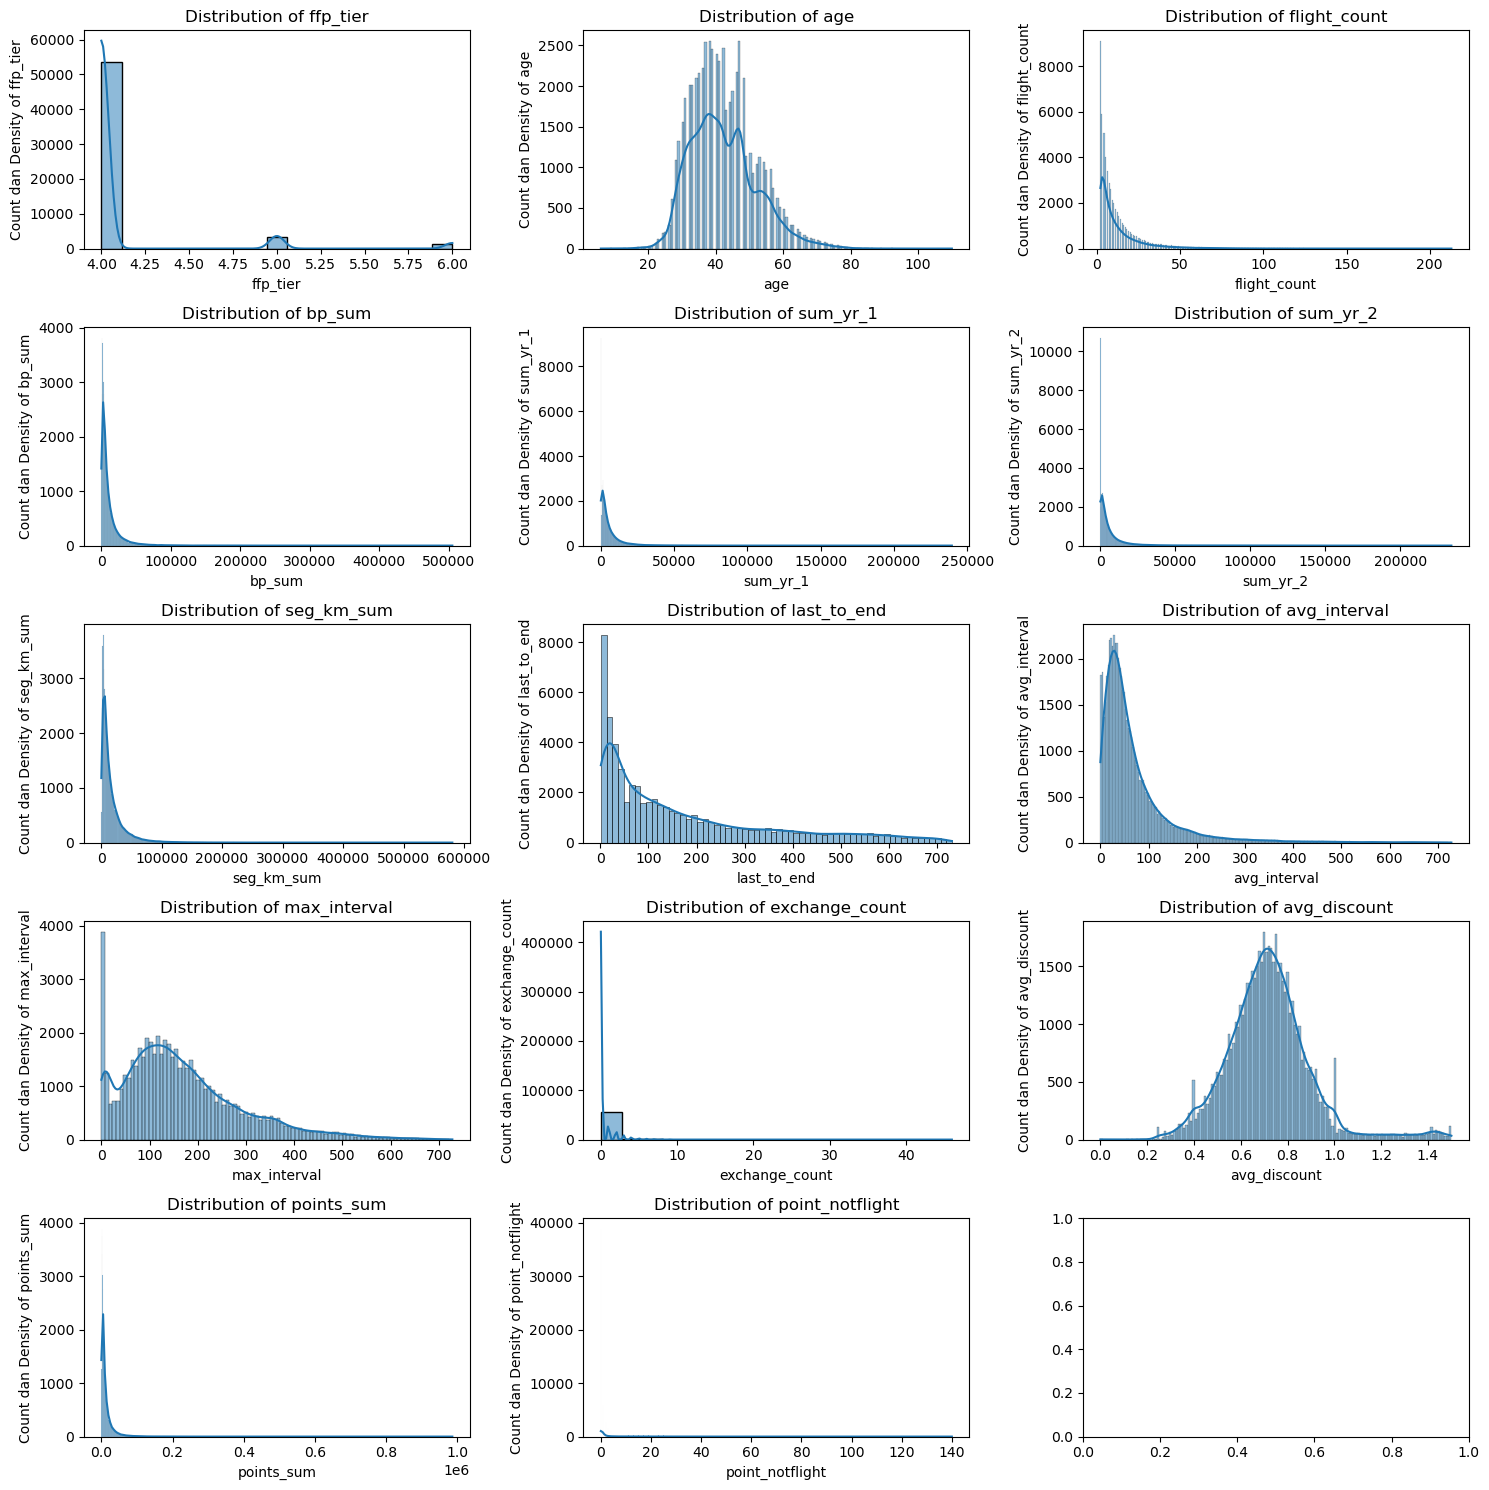

In [33]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(ax=axes[i], x=df[nums[i]], kde=True)
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

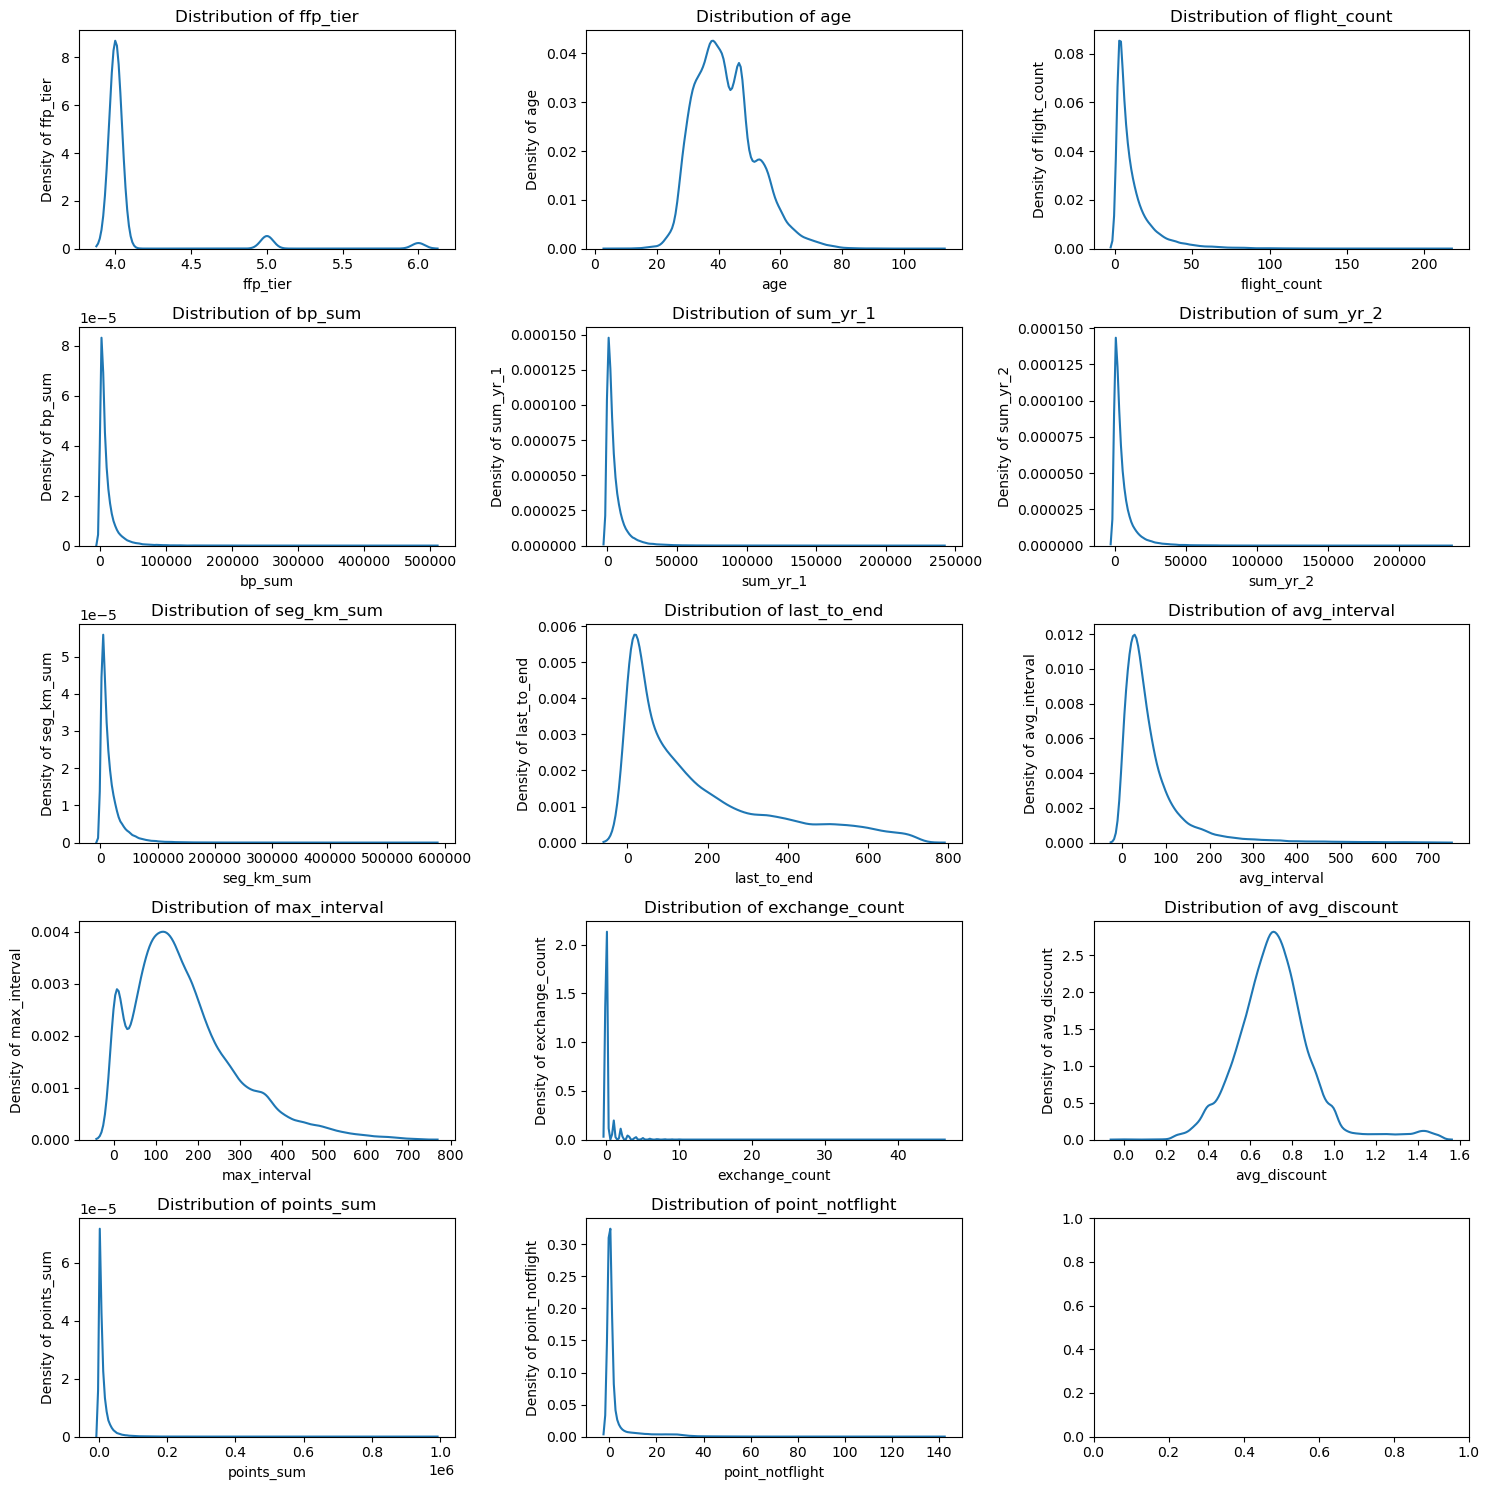

In [34]:
# Focusing on kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(ax=axes[i], x=df[nums[i]])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

All numeric columns have a right-skewed distribution/positively-skewed distribution except for the 'avg_discount' column. However, in the 'avg_discount' column, there are many average discounts greater than 1 (100%), and this is considered invalid. Therefore, it will not be used and will be dropped later.

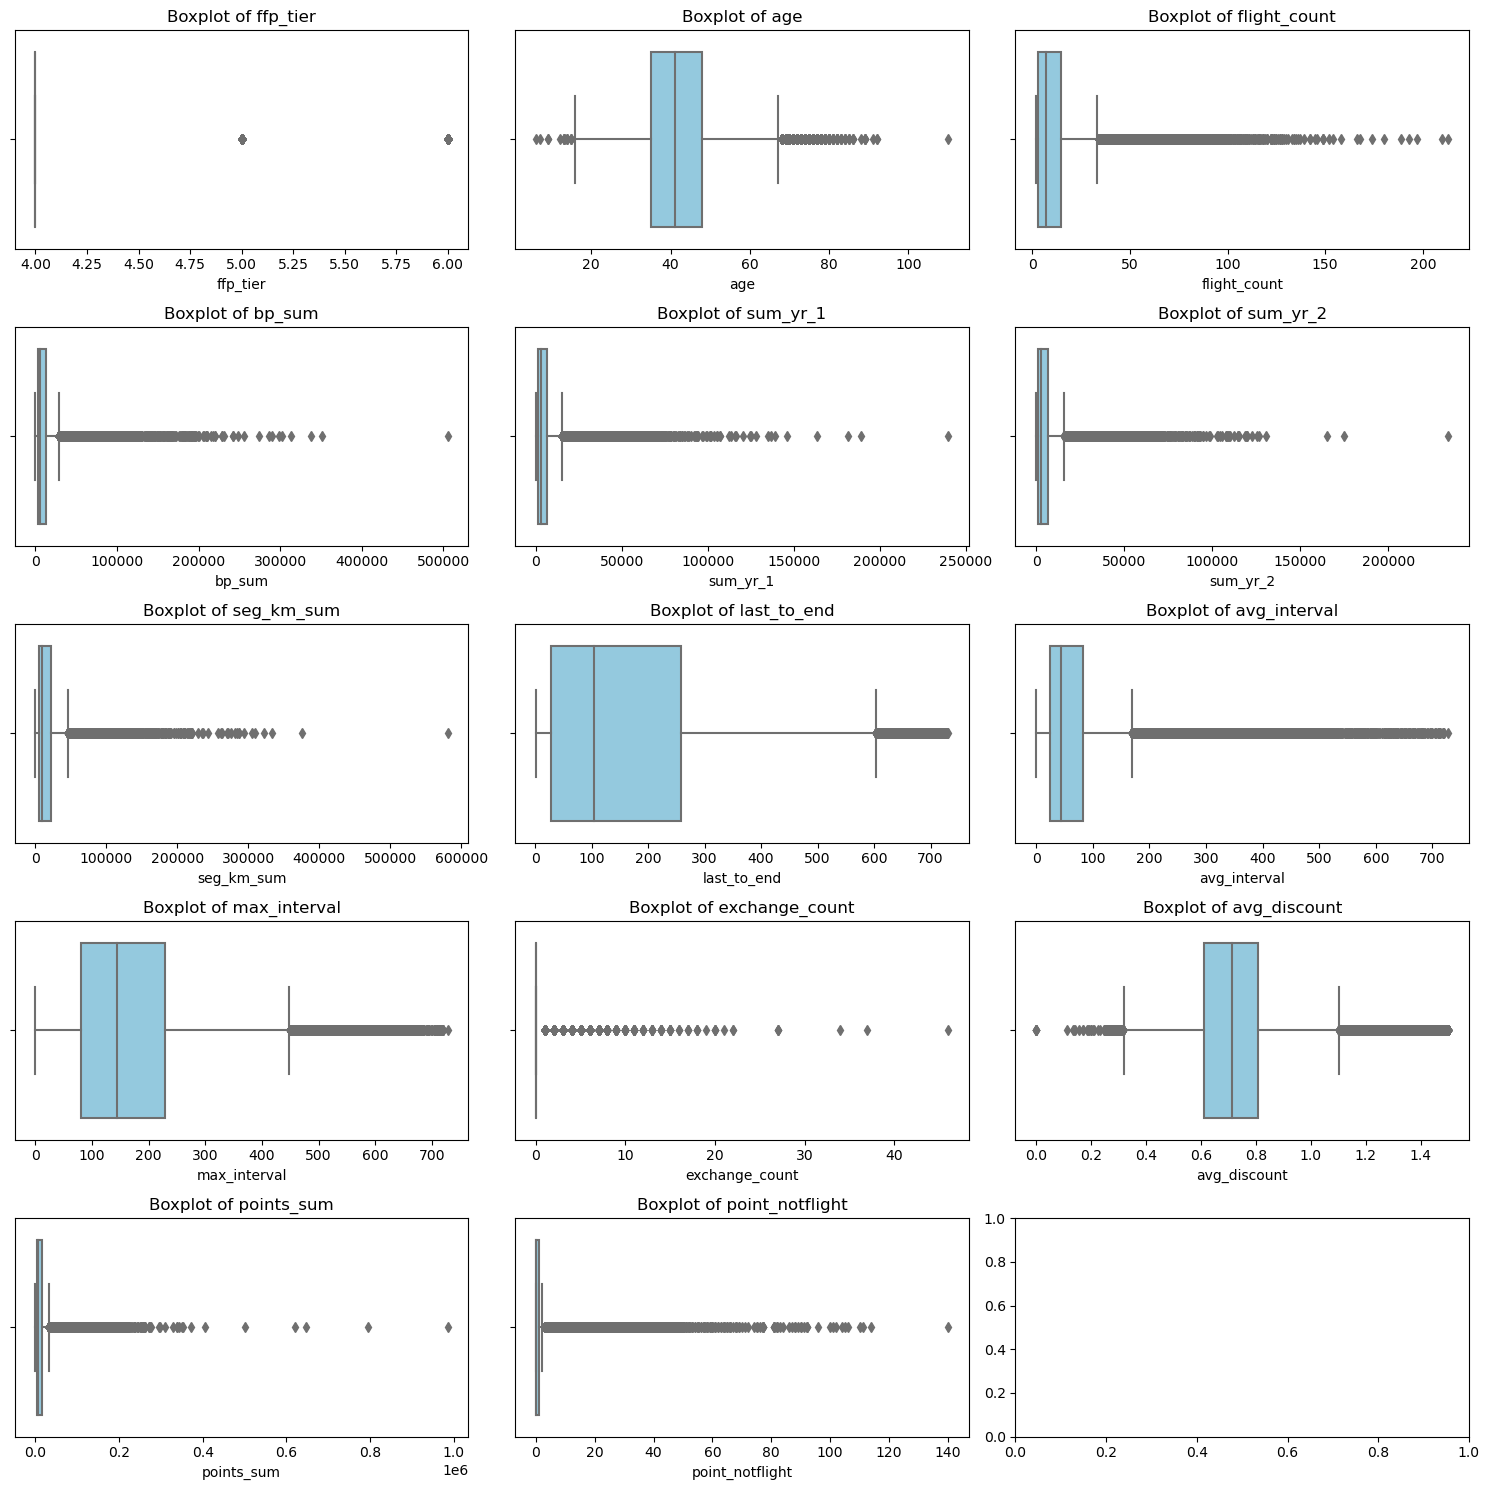

In [35]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

plt.tight_layout()

There are numerous outliers that will be dropped using the IQR method due to the non-normal distribution of features in the previous findings

## Categorical Columns

In [36]:
df.columns

Index(['ffp_date', 'first_flight_date', 'gender', 'ffp_tier', 'work_city',
       'work_province', 'work_country', 'age', 'load_time', 'flight_count',
       'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_flight_date',
       'last_to_end', 'avg_interval', 'max_interval', 'exchange_count',
       'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

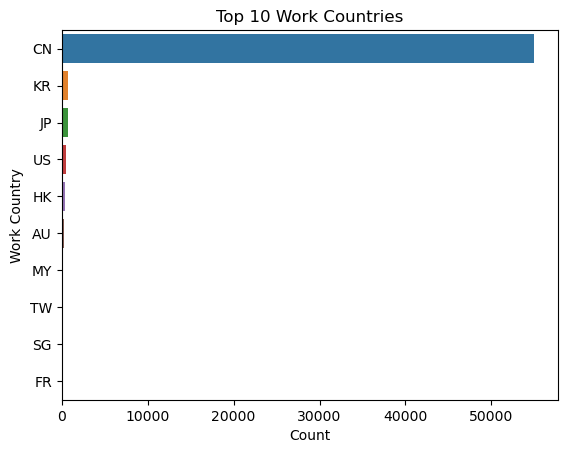

In [37]:
# Top 10 countries
df_country_top_10 = df['work_country'].value_counts().head(10)

sns.countplot(y='work_country', data=df, order=df_country_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work Country')
plt.title('Top 10 Work Countries')
plt.show()

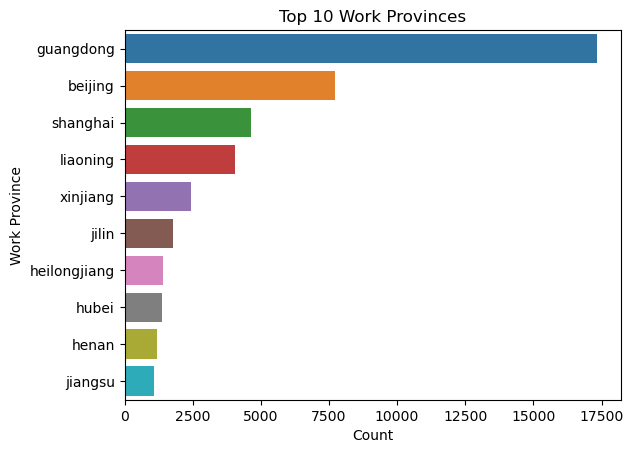

In [38]:
# Top 10 provinces
df_province_top_10 = df['work_province'].value_counts().head(10)

sns.countplot(y='work_province', data=df, order=df_province_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work Province')
plt.title('Top 10 Work Provinces')
plt.show()

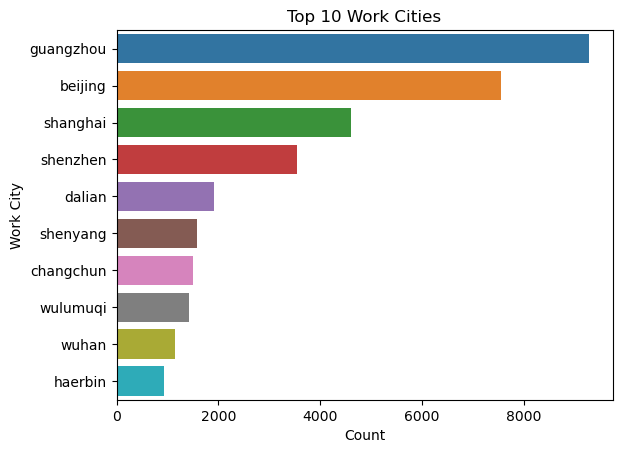

In [39]:
# Top 10 city
df_city_top_10 = df['work_city'].value_counts().head(10)

sns.countplot(y='work_city', data=df, order=df_city_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work City')
plt.title('Top 10 Work Cities')
plt.show()

# Bivariate/Multivariate Analysis

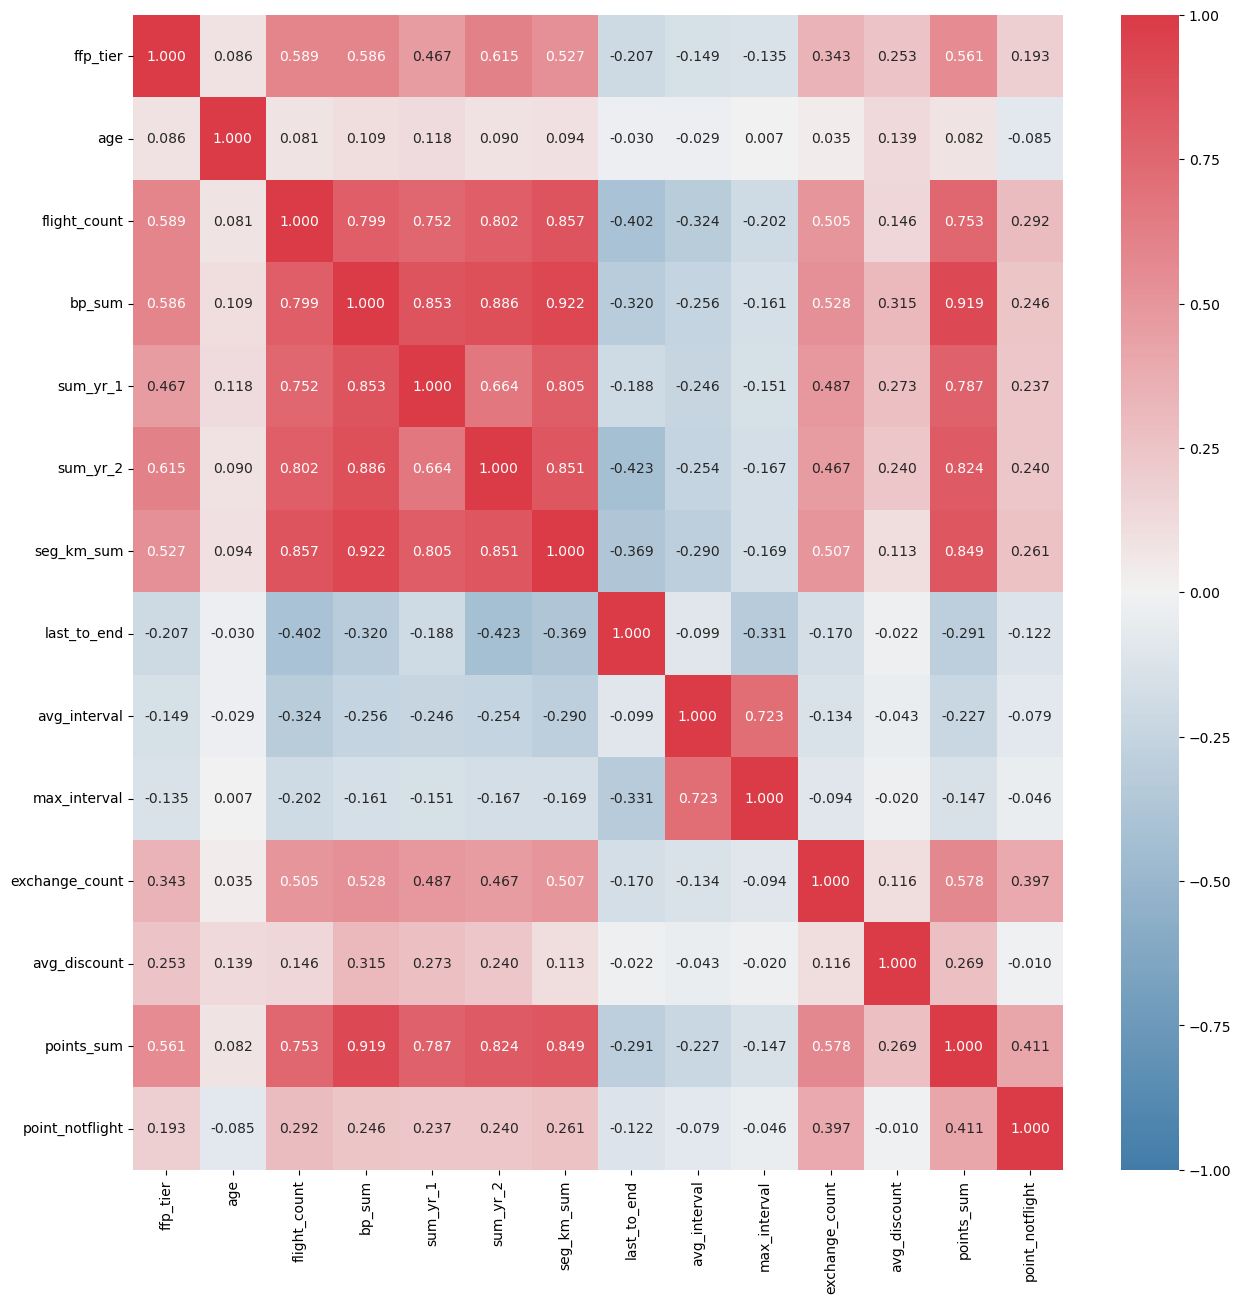

In [40]:
# Heatmap
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

- Columns with strong correlation (equal to/above 0.3):
    - ffp_tier with flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, points_sum
    - flight_count with bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, avg_interval, exchange_count, points_sum
    - bp_sum with sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, exchange_count, avg_discount, poins_sum
    - sum_yr_1 with sum_yr_2, seg_km_sum, exchange_count, points_sum
    - sum_yr_2 with seg_km_sum, last_to_end, exchange_count, points_sum
    - seg_km_sum with last_to_end, exchange_count, points_sum
    - last_to_end with max_interval
    - avg_interval with max_interval
    - exchange_count with points_sum, point_notflight
    - points_sum with point_notflight
<br/><br/>
 - Columns with high multicollinearity (equal to/above 0.7):
    - flight_count with bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, points_sum
    - bp_sum with sum_yr_1, sum_yr_2, seg_km_sum, poins_sum    
    - sum_yr_1 with seg_km_sum, points_sum
    - sum_yr_2 with seg_km_sum, points_sum
    - avg_interval with max_interval

We can also see from the colour that the feature age and max_interval have low correlation score to almost all other features

In [41]:
# # Pairplot before clustering
# sns.pairplot(data=df, diag_kind='kde')
# plt.show()

# Feature Selection Thinking Process

Selected features include last_to_end, flight_count, seg_km_sum, loyality (will be engineered). The reason for choosing these features is because they can be associated with the RFM (Recency, Frequency, & Monetary) concept. Additionally, they meet the criteria of high correlation among each other.

- Recency: last_to_end
- Frequency: flight_count
- Monetary: seg_km_sum
- (Additional) Loyality : load_time - ffp_date; in months

In [42]:
#Feature engineering of RFM
df['recency'] = df['last_to_end']
df['frequency'] = df['flight_count']
df['monetary'] = df['seg_km_sum']

In [44]:
#Feature engineering of loyalty

from datetime import timedelta

df['loyalty'] = df['load_time'] - df['ffp_date']

# Define a function to convert timedelta to months
def timedelta_to_months(td):
    total_days = td.total_seconds() / (60 * 60 * 24) #total second in an minute, total minute in an hour, and total hour in a day
    return total_days / 30.44 #average days in a month

# Apply the function to the 'loyalty' column
df['loyalty'] = df['loyalty'].apply(timedelta_to_months)
df

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ffp_date           58255 non-null  datetime64[ns]
 1   first_flight_date  58255 non-null  datetime64[ns]
 2   gender             58255 non-null  object        
 3   ffp_tier           58255 non-null  int64         
 4   work_city          58255 non-null  object        
 5   work_province      58255 non-null  object        
 6   work_country       58255 non-null  object        
 7   age                58255 non-null  int32         
 8   load_time          58255 non-null  datetime64[ns]
 9   flight_count       58255 non-null  int64         
 10  bp_sum             58255 non-null  int64         
 11  sum_yr_1           58255 non-null  int32         
 12  sum_yr_2           58255 non-null  int32         
 13  seg_km_sum         58255 non-null  int64         
 14  last_flight

In [49]:
#Check engineered features
df.sample(5)

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,recency,frequency,monetary,loyalty
55710,2010-04-09,2010-04-09,Female,4,shenzhen,guangdong,CN,52,2014-03-31,4,1842,0,2598,2766,2014-01-26,66,80.333333,94,1,0.688377,11511,39,66,4,2766,47.700394
54596,2012-01-26,2012-01-26,Female,4,shenzhen,guangdong,CN,29,2014-03-31,3,1549,0,1761,3242,2013-05-25,312,4.500000,9,0,0.637014,1549,0,312,3,3242,26.116951
31218,2011-04-27,2011-04-27,Male,4,beijing,beijing,CN,67,2014-03-31,7,5932,2232,4126,12370,2013-12-23,100,72.666667,250,0,0.571576,5932,0,100,7,12370,35.118265
24814,2012-09-10,2012-09-10,Male,4,SAPPORO-SHI,HOKKAIDO,JP,57,2014-03-31,6,9061,10200,2975,11898,2013-05-11,326,48.600000,72,0,0.808333,9061,0,326,6,11898,18.626807
16665,2012-07-14,2012-07-14,Male,4,dalian,liaoning,CN,35,2014-03-31,17,11803,3862,9707,20724,2014-03-18,14,38.312500,97,0,0.702588,11803,0,14,17,20724,20.532194


In [48]:
#Select relevant features for analysis
selected_features = ['recency', 'frequency', 'monetary', 'loyalty']

df_selected = df[selected_features].copy()

# Handling Outliers


As explained before that the consideration in using the IQR (Interquartile Range) method to remove outliers is because the distribution of the data is skewed or not normal

**Additional Reminder (for me especially) About Outliers Handling**

Both IQR (Interquartile Range) and Z-Score methods are commonly used for handling outliers in a dataset. The choice between them depends on the nature of the data and the specific requirements of the analysis. Here are some considerations for when to use each method:

1. **IQR (Interquartile Range):**
   - **When the distribution is not normal or skewed:** IQR is robust to skewed distributions, making it suitable for datasets that do not follow a normal distribution.
   - **When there are suspected extreme values:** IQR is less sensitive to extreme values compared to Z-Score, making it suitable for datasets with potential outliers.

2. **Z-Score:**
   - **When the distribution is approximately normal:** Z-Score assumes a normal distribution, and it is more appropriate when dealing with data that is approximately normally distributed.
   - **For standardized comparisons:** Z-Score provides a standardized measure of how far each data point is from the mean, making it useful for comparing outliers across different datasets.

3. **Considerations for Both Methods:**
   - **Nature of the data:** Understand the characteristics of the data and the underlying distribution. If the data is strongly skewed, IQR might be more suitable. If it approximately follows a normal distribution, Z-Score could be considered.
   - **Analysis goals:** Consider the goals of your analysis. If your primary concern is identifying extreme values or handling skewed data, IQR may be preferable. If you need a standardized measure for comparisons, Z-Score might be more appropriate.

In many cases, it's beneficial to explore and compare the results of both methods to determine which one is more effective for a particular dataset and analysis goal. Additionally, visual exploration of the data using box plots or histograms can provide insights into the distribution and potential outliers, helping in the decision-making process.

In [57]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_selected)}')

filtered_entries = np.array([True] * len(df_selected))

# Select features with outliers
for col in selected_features:

    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_selected[col] >= lower_bound) & (df_selected[col] <= upper_bound)) & filtered_entries

df_filtered = df_selected[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_filtered)}')

The number of rows before filtering out outliers : 58255
The number of rows after filtering out outliers: 50710


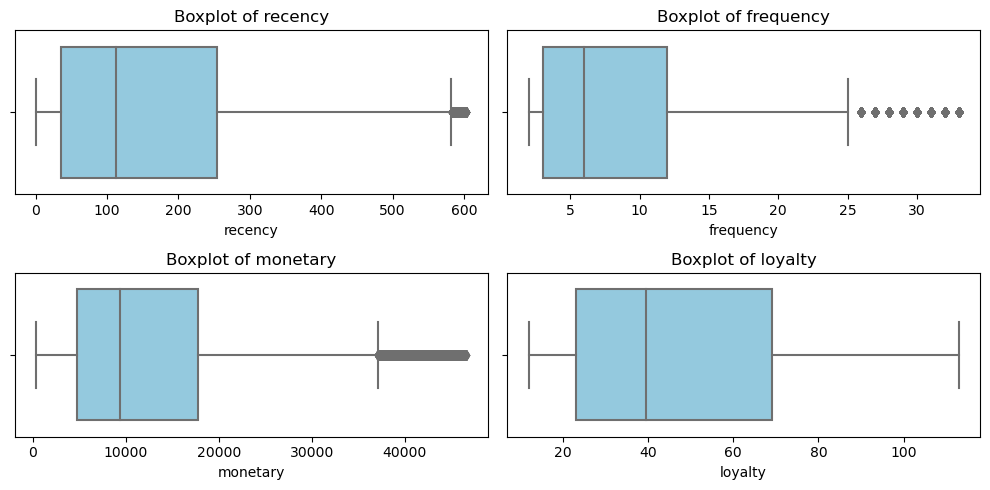

In [62]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
axes = axes.flatten()

for i in range(len(selected_features)) :
  sns.boxplot(ax=axes[i], x=df_filtered[selected_features[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {selected_features[i]}')

plt.tight_layout()

# Feature Scaling

In [63]:
# Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_std_values = ss.fit_transform(df_selected[selected_features])

In [64]:
df_std_values 

array([[-0.94293674, 13.90330889, 26.86561168,  1.48140186],
       [-0.88755305,  8.63510447, 12.70208506,  1.37309737],
       [-0.4112533 ,  0.76791921, 12.58877875,  0.69708688],
       ...,
       [-0.45556026, -0.56669258, -0.4452614 ,  0.02702719],
       [-0.7878624 , -0.70717803, -0.70382486,  1.73966643],
       [ 1.26687253, -0.70717803, -0.63992315, -1.24168263]])

In [65]:
# Initialize new dataframe
df_std = pd.DataFrame(df_std_values, columns=selected_features)
df_std.sample(5)

,recency,frequency,monetary,loyalty
34712,2.141935,-0.566693,-0.473493,1.733716
40407,-0.760171,-0.215479,-0.450650,0.854188
37304,-0.760171,-0.566693,-0.443115,0.206741
16280,-0.771247,0.767919,-0.093993,-0.878684
8840,-0.882015,0.346463,-0.032332,2.197878


In [ ]:
# Focusing on kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(ax=axes[i], x=df[nums[i]])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

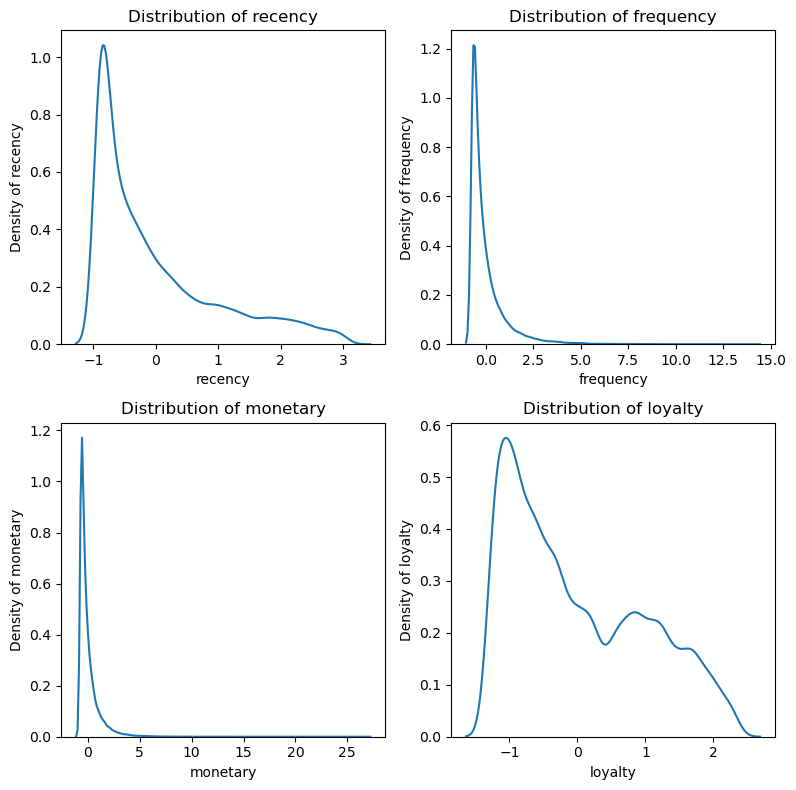

In [80]:
#Kdeplot after scaling

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axes = axes.flatten()

for i in range(len(selected_features)) :
    sns.kdeplot(ax=axes[i], x=df_std[selected_features[i]])
    axes[i].set_title(f'Distribution of {selected_features[i]}')
    axes[i].set_ylabel(f'Density of {selected_features[i]}')
    axes[i].set_xlabel(f'{selected_features[i]}')

plt.tight_layout()

# Clustering : K-means

## Finding Optimal Cluster Using Elbow Method and Silhouette Score

<Axes: >

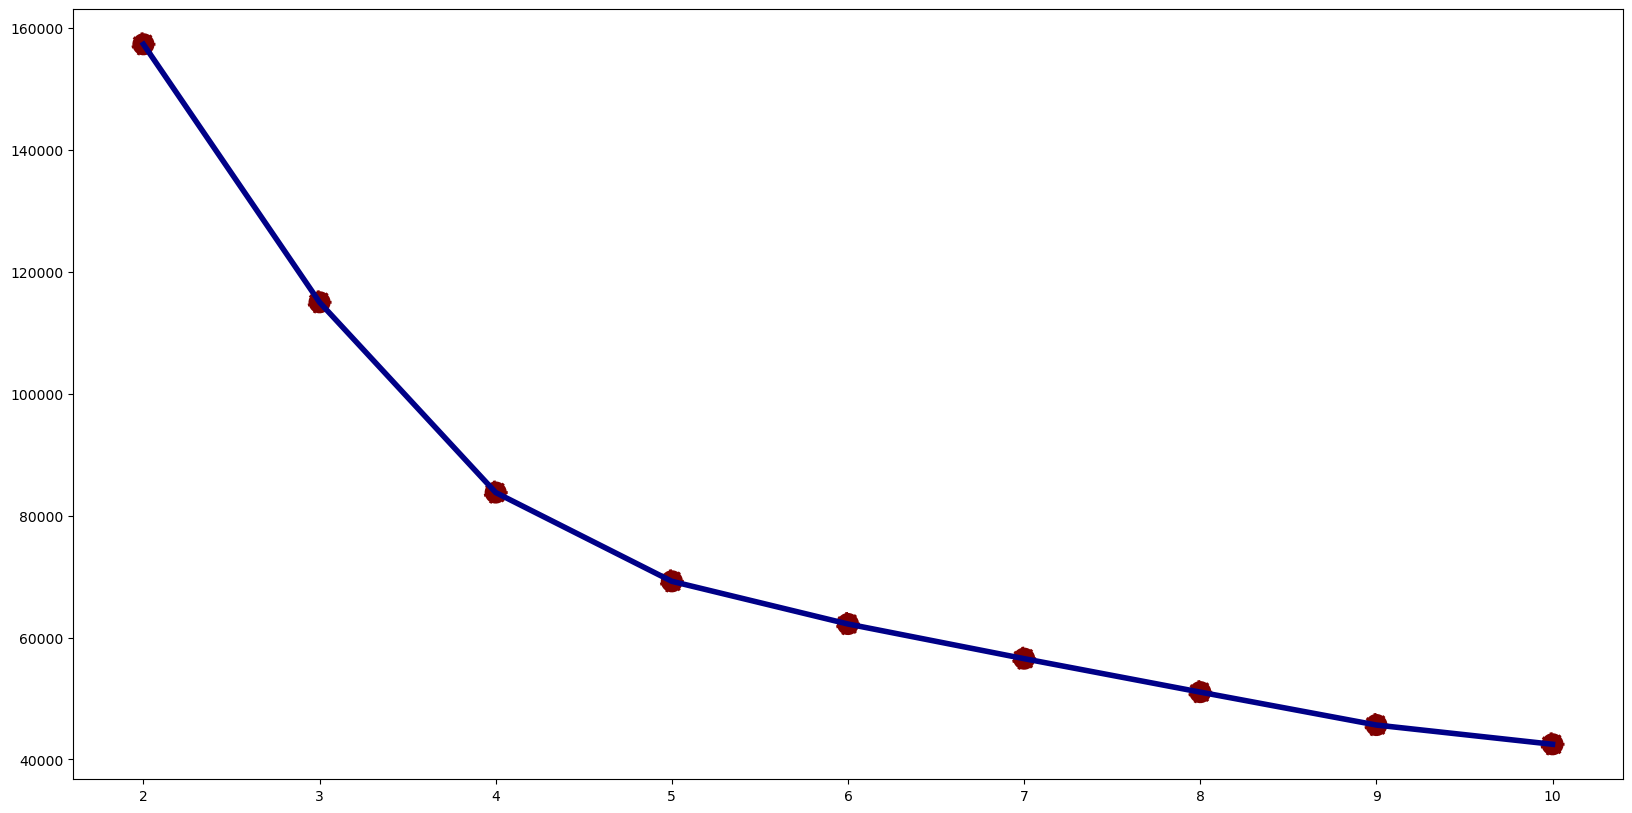

In [81]:
# Elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=4)
    kmeans.fit(df_std_values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [82]:
#List of inertias
inertia

[157299.81076358288,
 114982.3328190984,
 83778.50222124855,
 69217.23957125848,
 62213.89788799048,
 56529.923785606494,
 51043.23915365398,
 45644.6867594827,
 42488.363363261255]

In [83]:
# Inertia reduction by cluster in percentage
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    26.902434
1    27.137935
2    17.380667
3    10.117915
4     9.136181
5     9.705806
6    10.576430
7     6.914985
8          NaN
dtype: float64

We can see that from elbow method (internal evaluation), the number of optimal cluster is N = 4, because that's where the decrease of inertia is small for the next ampint of clusters

In [84]:
# Silhouette score
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
# arr_silhouette_score_mahalanobis = []

for i in list(range(2,11)):
    kmeans = KMeans(n_clusters=i).fit(df_std_values)
    preds = kmeans.predict(df_std_values)
    
    #Using euclidean (faster)
    score_euclidean = silhouette_score(df_std_values, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

    # #Using mahalanobis
    # score_mahalanobis = silhouette_score(df_std, preds, metric='mahalanobis')
    # arr_silhouette_score_mahalanobis.append(score_mahalanobis)

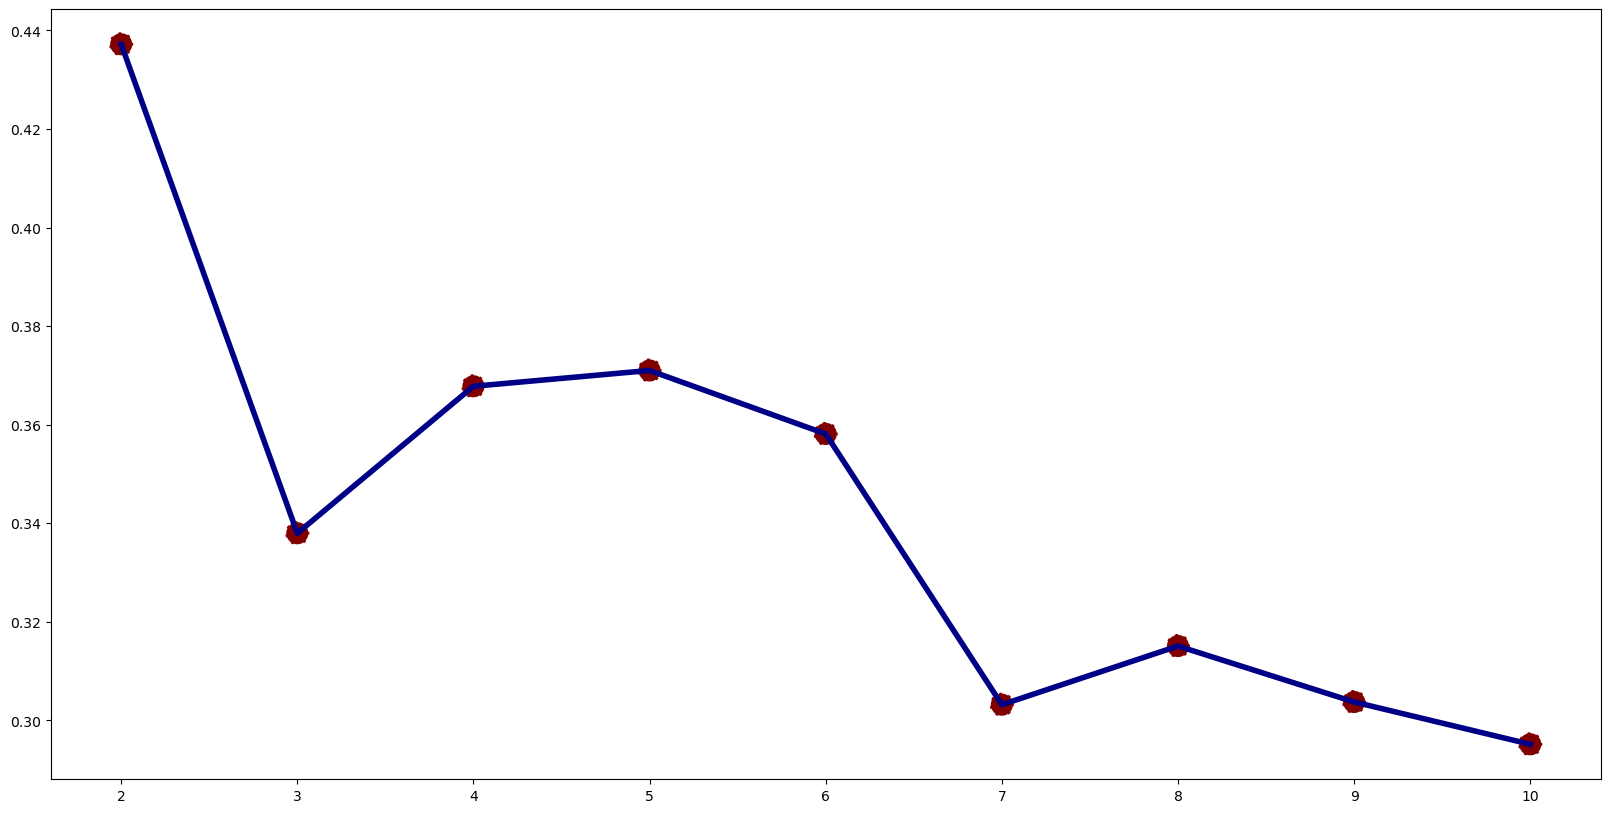

In [85]:
#Visualize silhouette score
fig, ax = plt.subplots(figsize=(20, 10))

#Using euclidean (faster)
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

# #Using mahalanobis
# sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

plt.show()

In [86]:
# Silhouette score reduction by cluster in percentage
(pd.Series(arr_silhouette_score_euclidean) - pd.Series(arr_silhouette_score_euclidean).shift(-1)) / pd.Series(arr_silhouette_score_euclidean) * 100

0    22.691648
1    -8.822482
2    -0.871653
3     3.469882
4    15.339778
5    -3.925745
6     3.603504
7     2.825112
8          NaN
dtype: float64

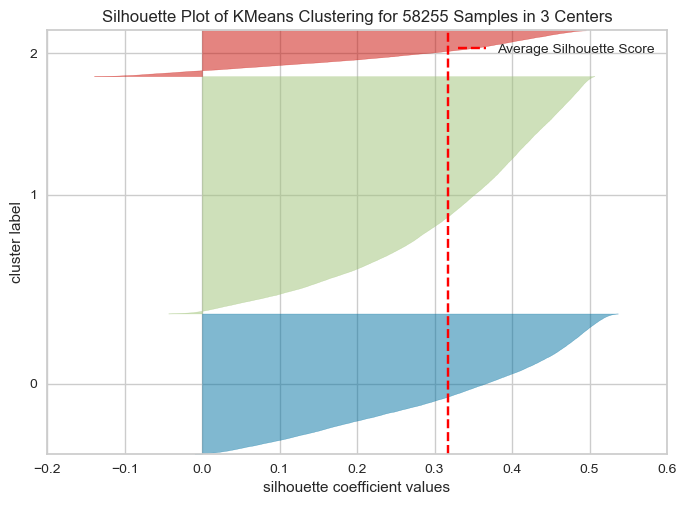

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
#Silhouetter plot (3 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_std_values)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

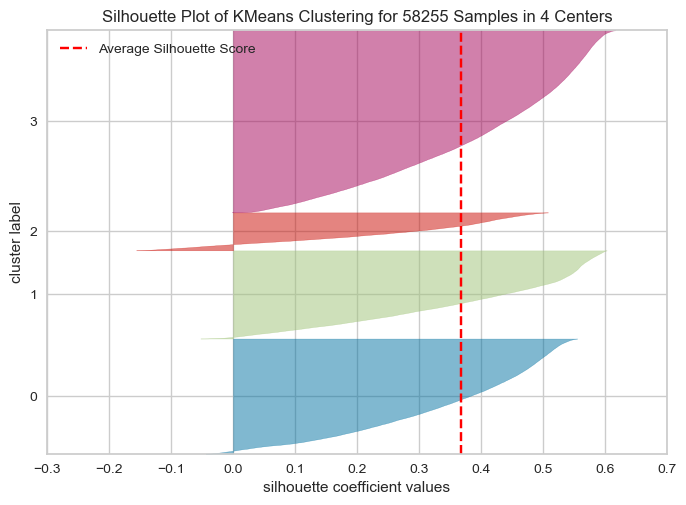

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [90]:
#Silhouetter plot (4 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_std_values)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

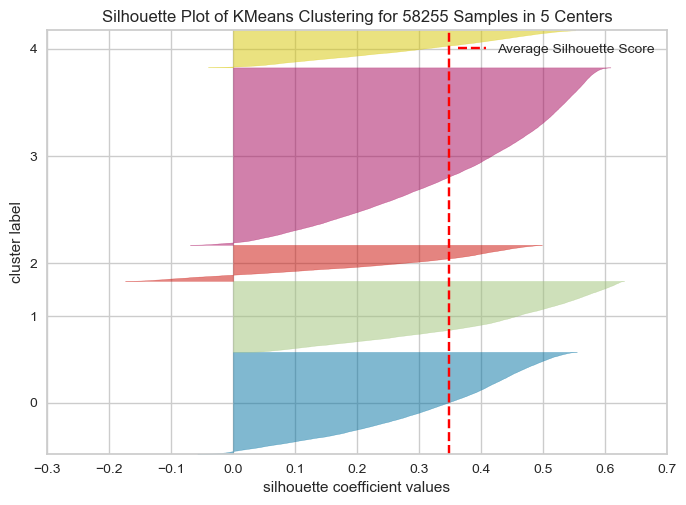

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [89]:
#Silhouetter plot (5 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_std_values)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

Reference for yellowbrick : https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

We can see that from silhouette score and plot (another internal evaluation), the number of optimal cluster is also 4

## Clustering Process Using K-means

In [ ]:
#Fit cluster into our scaled dataframe
kmeans = KMeans(n_clusters=3, random_state=4).fit(df_std)

In [ ]:
#Assign the cluster to our original dataframe and scaled dataframe
df_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [ ]:
#See original dataframe by selected features with its assigned cluster
df[df_std.columns].head(5)

In [ ]:
#See scaled dataframe with its assigned cluster
df_std.head(5)

# PCA and Visualization

Since there are 5 features being used, PCA should be employed for 2D visualization to make it easier to observe.

In [ ]:
#PCA method to reduce features to 2
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_std_values)
pcs = pca.transform(df_std_values)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_std['clusters']
data_pca.head(5)

In [ ]:
#Visualize cluster
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

In [ ]:
#Additional visualization about pairplot of PCA
sns.pairplot(data=data_pca, hue='clusters', diag_kind='kde')

# Cluster Interpretation and Business Recommendation

In [ ]:
#See original dataframe grouped with cluster aggregated by mean and median
display(df[df_std.columns].groupby('clusters').agg(['mean','median', 'std']))

## Contextual description of what kind of customers exist in each cluster

- **Cluster 0**: Customers who rarely use the service, receive a small number of points, and last used the service at the latest date among the data collected.
- **Cluster 2**: Customers with a moderate frequency of flights, receive a moderate number of points, and last used the service at a moderate distance from the date the data was collected.
- **Cluster 1**: Customers who frequently use the service, receive a high number of points, and last used the service at the closest date among the data collected.

## Business Recommendation For Each Cluster

In general, the following two recommendations can be made:
1. Create specific campaigns for each customer segment, as each segment exhibits different behavioral patterns.
2. Follow up on the reactions from each segment regarding the campaigns/treatments conducted to continuously improve the services for each segment.

Specific recommendations for each cluster are as follows:

- **Cluster 0: Customers who rarely use the service**
  - Business Recommendation: Conduct further analysis to understand the reasons behind the low usage frequency. Special marketing strategies or offers may be needed to enhance their engagement, such as exclusive discounts, loyalty programs, or promotions that can capture their interest.

- **Cluster 2: Customers with a moderate frequency of flights**
  - Business Recommendation: Develop a loyalty program or special offers to increase engagement and service usage frequency. Providing incentives or additional benefits to customers in this category can stimulate them to be more active in using the service.

- **Cluster 1: Customers who frequently use the service**
  - Business Recommendation: Grant special rewards or incentives to customers in this category as a form of recognition for their loyalty. Involving them in exclusive loyalty programs or providing additional benefits can strengthen the business relationship and ensure high customer retention.